In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import (
    roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, confusion_matrix,
    roc_curve, precision_recall_curve
)
import joblib
import warnings
warnings.filterwarnings('ignore')


In [5]:
##4.1LoadData
X_train=pd.read_csv('../Dataset/X_train.csv')
X_test=pd.read_csv('../Dataset/X_test.csv')
y_train=pd.read_csv('../Dataset/y_train.csv')['risiko_gagal'].values
y_test=pd.read_csv('../Dataset/y_test.csv')['risiko_gagal'].values

print(f"Dara:")
print(f"X_train:{X_train.shape}")
print(f"X_test:{X_test.shape}")
print(f"\nBalance-Lulus:{(y_train==0).sum()}({(y_train==0).mean()*100:.1f}%)")
print(f"Balance-Gagal:{(y_train==1).sum()}({(y_train==1).mean()*100:.1f}%)")


Dara:
X_train:(730, 39)
X_test:(314, 39)

Balance-Lulus:569(77.9%)
Balance-Gagal:161(22.1%)


In [6]:
# ## 4.2 Baseline Model - Logistic Regression

print("Training Baseline Model: Logistic Regression")

# Train
lr_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
lr_model.fit(X_train, y_train)

# Predik
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Metriks
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
rec_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Hasil Regresp:")
print(f"   AUC-ROC: {auc_lr:.4f}")
print(f"   Accuracy: {acc_lr:.4f}")
print(f"   Precision: {prec_lr:.4f}")
print(f"   Recall: {rec_lr:.4f}")
print(f"   F1-Score: {f1_lr:.4f}")


Training Baseline Model: Logistic Regression
Hasil Regresp:
   AUC-ROC: 1.0000
   Accuracy: 1.0000
   Precision: 1.0000
   Recall: 1.0000
   F1-Score: 1.0000


In [7]:
## 4.3 Decision Tree

print("Training Model: Decision Tree")

# Train
dt_model = DecisionTreeClassifier(
    random_state=42, 
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight='balanced'
)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Metrics
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"Decision Tree Results:")
print(f"   AUC-ROC: {auc_dt:.4f}")
print(f"   Accuracy: {acc_dt:.4f}")
print(f"   Precision: {prec_dt:.4f}")
print(f"   Recall: {rec_dt:.4f}")
print(f"   F1-Score: {f1_dt:.4f}")


Training Model: Decision Tree
Decision Tree Results:
   AUC-ROC: 0.9995
   Accuracy: 0.9904
   Precision: 0.9714
   Recall: 0.9855
   F1-Score: 0.9784


In [8]:
# ## 4.4 Random Forest
print("Training Model: Random Forest")

# Train
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Metrics
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest Results:")
print(f"   AUC-ROC: {auc_rf:.4f}")
print(f"   Accuracy: {acc_rf:.4f}")
print(f"   Precision: {prec_rf:.4f}")
print(f"   Recall: {rec_rf:.4f}")
print(f"   F1-Score: {f1_rf:.4f}")


Training Model: Random Forest
Random Forest Results:
   AUC-ROC: 0.9933
   Accuracy: 0.9650
   Precision: 0.8816
   Recall: 0.9710
   F1-Score: 0.9241


In [9]:
# ## 4.5 XGBoost
print("Training Model: XGBoost")

# kalkukasi Skala Berat posisi
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Train
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    use_label_encoder=False
)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Metrics
auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print(f"XGBoost Results:")
print(f"   AUC-ROC: {auc_xgb:.4f}")
print(f"   Accuracy: {acc_xgb:.4f}")
print(f"   Precision: {prec_xgb:.4f}")
print(f"   Recall: {rec_xgb:.4f}")
print(f"   F1-Score: {f1_xgb:.4f}")


Training Model: XGBoost
XGBoost Results:
   AUC-ROC: 1.0000
   Accuracy: 0.9968
   Precision: 0.9857
   Recall: 1.0000
   F1-Score: 0.9928


In [ ]:
print("Training Model: LightGBM")

# Train
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    class_weight='balanced',
    verbose=-1
)
lgb_model.fit(X_train, y_train)

# Predict
y_pred_lgb = lgb_model.predict(X_test)
y_pred_proba_lgb = lgb_model.predict_proba(X_test)[:, 1]

# Metrics
auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)
acc_lgb = accuracy_score(y_test, y_pred_lgb)
prec_lgb = precision_score(y_test, y_pred_lgb)
rec_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)

print(f"\n✅ LightGBM Results:")
print(f"   AUC-ROC: {auc_lgb:.4f}")
print(f"   Accuracy: {acc_lgb:.4f}")
print(f"   Precision: {prec_lgb:.4f}")
print(f"   Recall: {rec_lgb:.4f}")
print(f"   F1-Score: {f1_lgb:.4f}")


Training Model: LightGBM

✅ LightGBM Results:
   AUC-ROC: 1.0000
   Accuracy: 1.0000
   Precision: 1.0000
   Recall: 1.0000
   F1-Score: 1.0000


Perbandingan
              Model  AUC-ROC  Accuracy  Precision   Recall  F1-Score
Logistic Regression 1.000000  1.000000   1.000000 1.000000  1.000000
            XGBoost 1.000000  0.996815   0.985714 1.000000  0.992806
           LightGBM 1.000000  1.000000   1.000000 1.000000  1.000000
      Decision Tree 0.999468  0.990446   0.971429 0.985507  0.978417
      Random Forest 0.993256  0.964968   0.881579 0.971014  0.924138


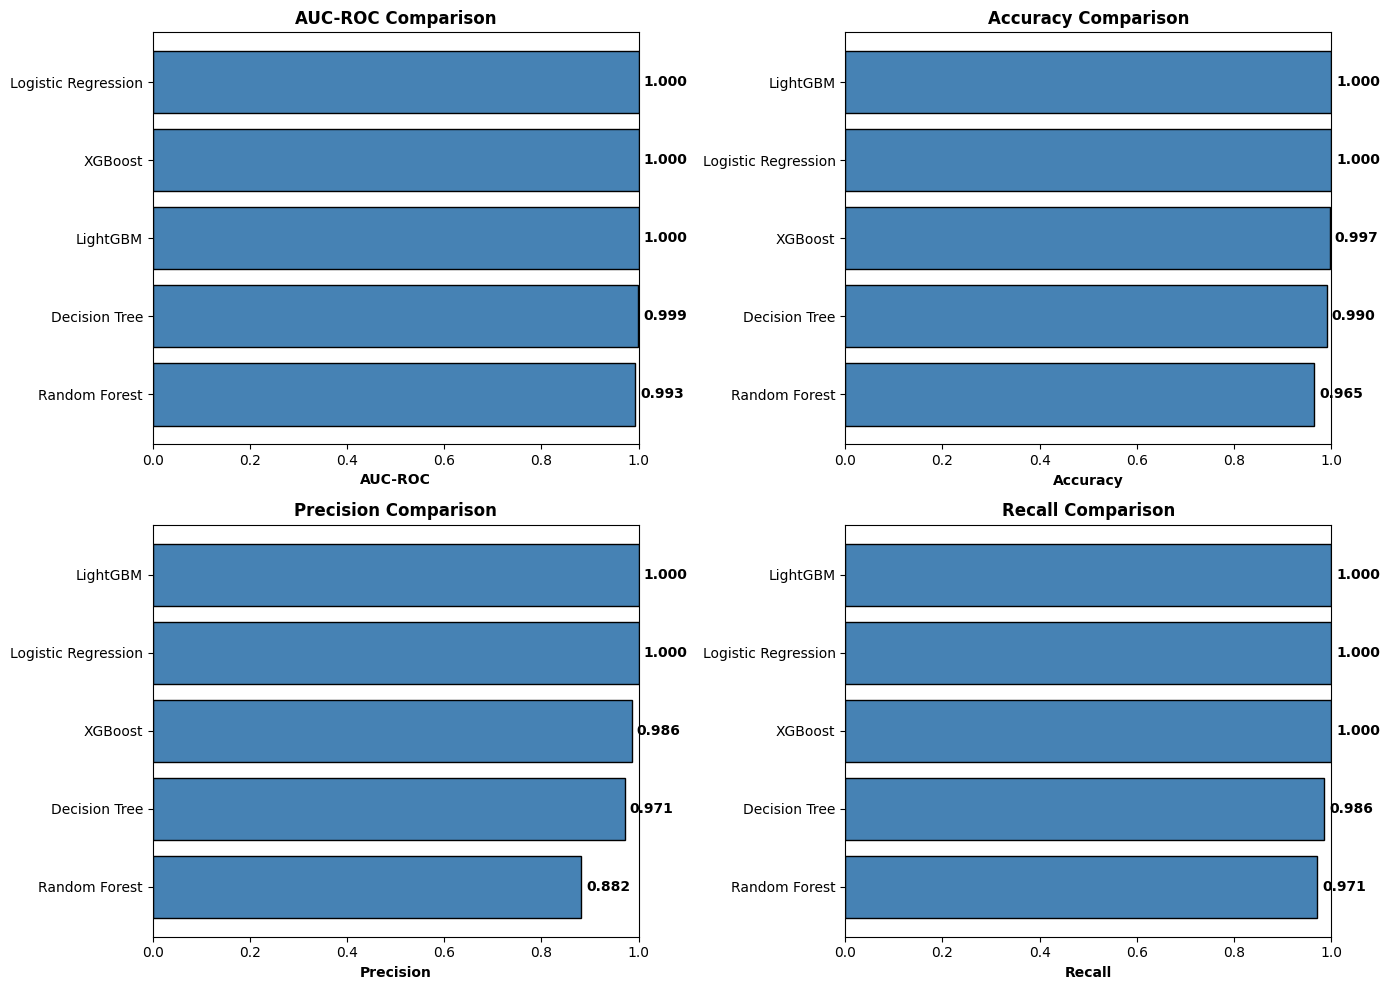

In [11]:
# ## 4.7 Perbandingan Model
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'AUC-ROC': [auc_lr, auc_dt, auc_rf, auc_xgb, auc_lgb],
    'Accuracy': [acc_lr, acc_dt, acc_rf, acc_xgb, acc_lgb],
    'Precision': [prec_lr, prec_dt, prec_rf, prec_xgb, prec_lgb],
    'Recall': [rec_lr, rec_dt, rec_rf, rec_xgb, rec_lgb],
    'F1-Score': [f1_lr, f1_dt, f1_rf, f1_xgb, f1_lgb]
})

# sortir berdasarkan AUC-ROC
results = results.sort_values('AUC-ROC', ascending=False).reset_index(drop=True)

print("Perbandingan")
print(results.to_string(index=False))

# Visualisasi Perbandingan
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['AUC-ROC', 'Accuracy', 'Precision', 'Recall']

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    
    sorted_results = results.sort_values(metric, ascending=True)
    
    axes[row, col].barh(sorted_results['Model'], sorted_results[metric], 
                        color='steelblue', edgecolor='black')
    axes[row, col].set_xlabel(metric, fontweight='bold')
    axes[row, col].set_title(f'{metric} Comparison', fontweight='bold')
    axes[row, col].set_xlim([0, 1])
    
    for j, v in enumerate(sorted_results[metric]):
        axes[row, col].text(v + 0.01, j, f'{v:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


In [ ]:
## 4.8 Pilih Model Terbaik

best_model_name = results.iloc[0]['Model']
best_auc = results.iloc[0]['AUC-ROC']

print(f"Model Terbaik: {best_model_name}")
print(f"   AUC-ROC: {best_auc:.4f}")


models = {
    'Logistic Regression': lr_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'LightGBM': lgb_model
}

best_model = models[best_model_name]

# Ambil Prediksi Terbaik
if best_model_name == 'Logistic Regression':
    y_pred_best = y_pred_lr
    y_pred_proba_best = y_pred_proba_lr
elif best_model_name == 'Decision Tree':
    y_pred_best = y_pred_dt
    y_pred_proba_best = y_pred_proba_dt
elif best_model_name == 'Random Forest':
    y_pred_best = y_pred_rf
    y_pred_proba_best = y_pred_proba_rf
elif best_model_name == 'XGBoost':
    y_pred_best = y_pred_xgb
    y_pred_proba_best = y_pred_proba_xgb
else:  # LightGBM
    y_pred_best = y_pred_lgb
    y_pred_proba_best = y_pred_proba_lgb


Model Terbaik: Logistic Regression
   AUC-ROC: 1.0000


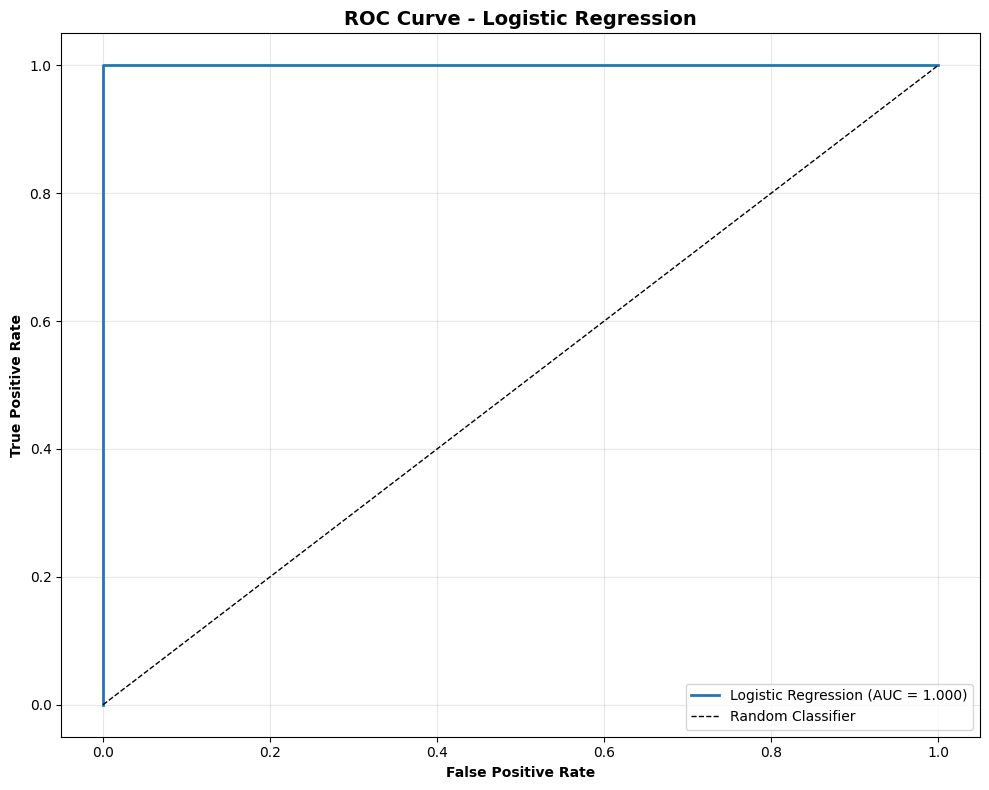

In [ ]:
# ## 4.9 ROC Curve (Logistik Regeresion)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, linewidth=2, label=f'{best_model_name} (AUC = {best_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
plt.xlabel('False Positive Rate', fontweight='bold')
plt.ylabel('True Positive Rate', fontweight='bold')
plt.title(f'ROC Curve - {best_model_name}', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


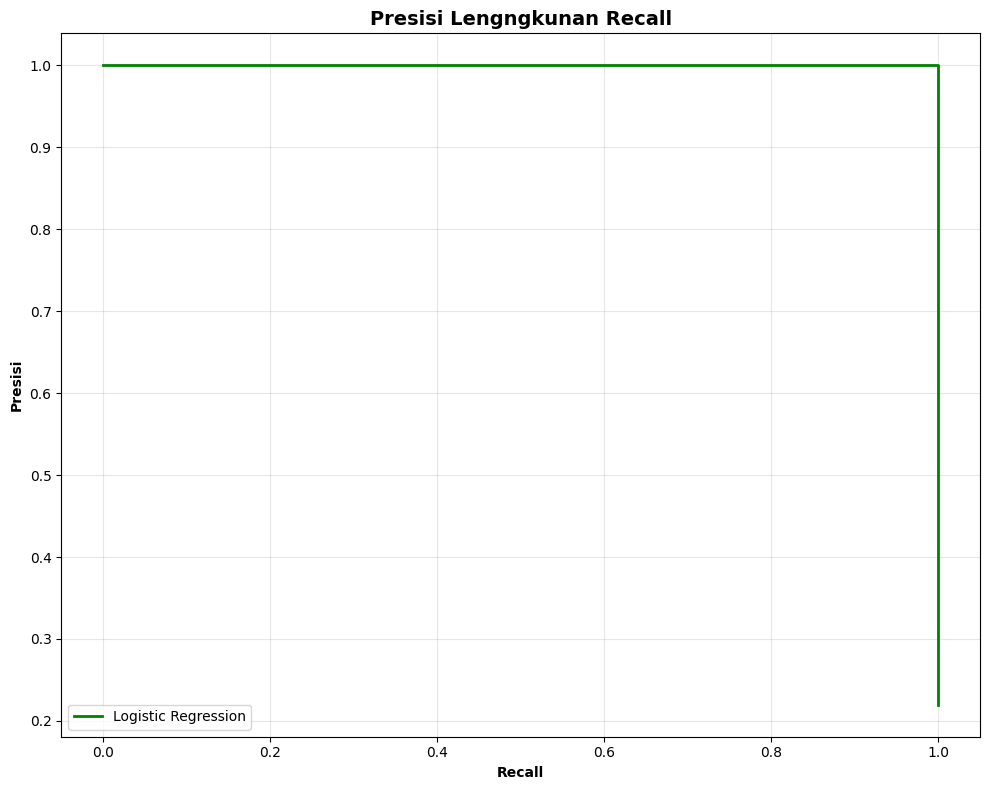

In [15]:
## 4.10 Presisi
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba_best)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, linewidth=2, color='green', 
         label=f'{best_model_name}')
plt.xlabel('Recall', fontweight='bold')
plt.ylabel('Presisi', fontweight='bold')
plt.title('Presisi Lengngkunan Recall', fontweight='bold', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [17]:
## 4.11 Simpan Model terbaik untuk Prediksi

# Simpan Model
joblib.dump(best_model, '../models/ModelTerkerenTerbaikDiduniaAGUNGPUNYA.pkl')

# Namanya
with open('../models/Namanya.txt', 'w') as f:
    f.write(best_model_name)

# Prediksinya
prediksi_df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred_best,
    'y_pred_proba': y_pred_proba_best
})
prediksi_df.to_csv('../Dataset/TesPrediksi.csv', index=False)

print("Agung Ganteng")


Agung Ganteng
